<a href="https://colab.research.google.com/github/sachit3071/Machine-Learning/blob/main/iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns

In [43]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
name = ['sepal-length','sepal-width','petal-length','petal-width','class']
dataset = pd.read_csv(url, names=name, skipinitialspace=True)

In [3]:
print(dataset.shape)
print(dataset.head())

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


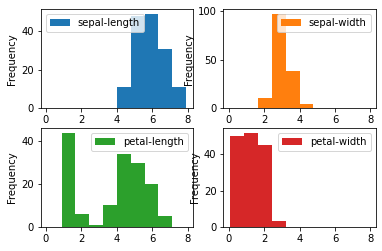

In [4]:
dataset.plot(kind='hist', subplots=True,layout=(2,2),sharex=False, sharey=False)
plt.show()

---
# Exploratory Data Analysis(EDA)

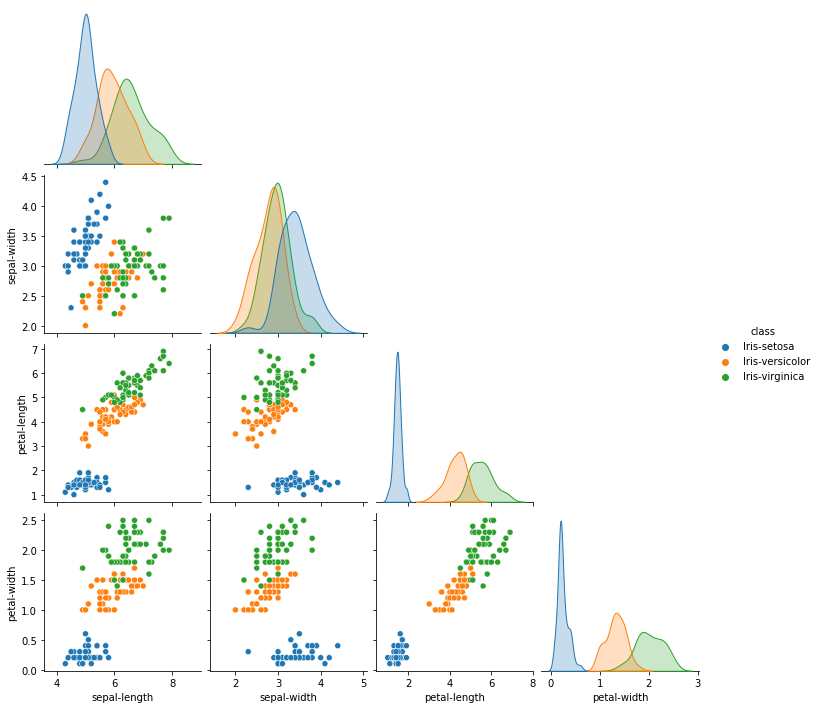

In [5]:
sns.pairplot(dataset, hue="class", corner=True)

---
# Train the model 

In [6]:
x_train=dataset.iloc[:120,:3]
y_train=dataset.iloc[:120,4]
x_test = dataset.iloc[120:,:3]
y_test = dataset.iloc[120:,4]

In [7]:
clf = LogisticRegression(random_state=0).fit(x_train,y_train)

In [8]:
clf.predict(x_test)

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [9]:
clf.score(x_train,y_train)

0.9666666666666667

---
### Using Cross-validation to evaluate






In [10]:
accuracies = cross_val_score(clf, x_train,y_train,cv=7)
print(accuracies)
np.mean(accuracies)

[1.         1.         0.94117647 0.94117647 0.88235294 1.
 0.94117647]


0.9579831932773111

### Where are we misclassifying points?

In [11]:
y_pred = cross_val_predict(clf,x_train,y_train,)
correct_prediction = np.array((y_pred==y_train))
correct_prediction=correct_prediction.astype(int)

In [39]:
dataset_prediction = dataset[:120].copy()
dataset_prediction["prediction"] = y_pred
dataset_prediction["correct_prediction"] = correct_prediction
dataset_prediction["prediction label"] = dataset_prediction["prediction"].map({1:"setosa",2:"versicolor",3:"verginica"})
# dataset_prediction.tail(20)

,sepal-length,sepal-width,petal-length,petal-width,class,prediction,correct_prediction,prediction label
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica,1,NaN
101,5.8,2.7,5.1,1.9,Iris-virginica,Iris-virginica,1,NaN
102,7.1,3.0,5.9,2.1,Iris-virginica,Iris-virginica,1,NaN
103,6.3,2.9,5.6,1.8,Iris-virginica,Iris-virginica,1,NaN
104,6.5,3.0,5.8,2.2,Iris-virginica,Iris-virginica,1,NaN
105,7.6,3.0,6.6,2.1,Iris-virginica,Iris-virginica,1,NaN
106,4.9,2.5,4.5,1.7,Iris-virginica,Iris-versicolor,0,NaN
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica,1,NaN
108,6.7,2.5,5.8,1.8,Iris-virginica,Iris-virginica,1,NaN
109,7.2,3.6,6.1,2.5,Iris-virginica,Iris-virginica,1,NaN


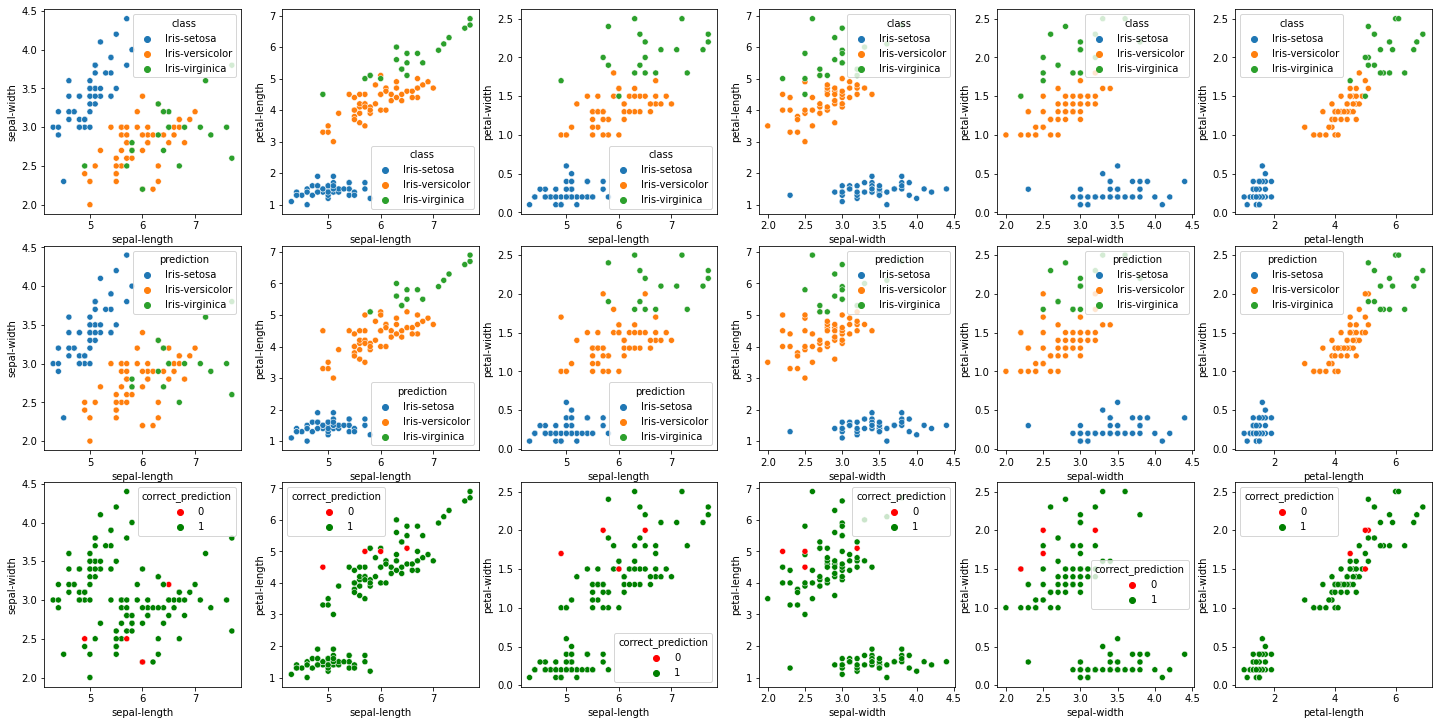

In [22]:
def plot_incorrect_predictions():
  fig,axes=plt.subplots(3,6,figsize=(20,10))
  plt.tight_layout()
  k=0
  for i in range(0,4):
    x_axis=dataset.columns[i]
    for j in range(i+1,4):
      y_axis=dataset.columns[j]
      if(x_axis!=y_axis and x_axis!="class" and y_axis!="class"):
        sns.scatterplot(x=x_axis,y=y_axis,hue="class",data=dataset_prediction,ax=axes[0,k]) #seaborn library for plotting
        sns.scatterplot(x=x_axis,y=y_axis,hue="prediction",data=dataset_prediction,ax=axes[1,k]) #seaborn library for plotting
        sns.scatterplot(x=x_axis,y=y_axis,hue="correct_prediction",data=dataset_prediction,ax=axes[2,k],palette=['red','green']) #seaborn library for plotting
        k=k+1
  # axes[0].set_title('Title with location at ', loc='center')
  plt.show() 
plot_incorrect_predictions()

---
#Model Tuning
######It refers to determine the parameters(also known as 'hyperparameters') that maximize the model performance

In [23]:
for regularization_parameter in (0.4,0.5,1,1.5):
  print(regularization_parameter)
  model = LogisticRegression(max_iter=150,C=regularization_parameter)
  accuracies = cross_val_score(model, x_train, y_train, cv=5, scoring="accuracy")
  print(f"Accuracy :{np.mean(accuracies)*100:.2f}%")

0.4
Accuracy :95.00%
0.5
Accuracy :95.00%
1
Accuracy :96.67%
1.5
Accuracy :96.67%
